In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


C:\Users\Paras Sharma\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
from sklearn.preprocessing import LabelEncoder,KBinsDiscretizer
from sklearn.model_selection import train_test_split
#Importing Classifier Modules from sklearn 
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix
from sklearn.metrics import confusion_matrix

In [3]:
dt= pd.read_csv("C:\\Users\\Paras Sharma\\OneDrive\\Desktop\\project\\diabetes1.csv")

In [4]:
dt.shape

(768, 7)

In [5]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pregnancies    768 non-null    int64  
 1   Glucose        768 non-null    int64  
 2   BloodPressure  768 non-null    int64  
 3   Insulin        768 non-null    int64  
 4   BMI            768 non-null    float64
 5   Age            768 non-null    int64  
 6   Outcome        768 non-null    int64  
dtypes: float64(1), int64(6)
memory usage: 42.1 KB


In [6]:
dt.head(10)

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,Age,Outcome
0,6,148,72,0,33.6,50,1
1,1,85,66,0,26.6,31,0
2,8,183,64,0,23.3,32,1
3,1,89,66,94,28.1,21,0
4,0,137,40,168,43.1,33,1
5,5,116,74,0,25.6,30,0
6,3,78,50,88,31.0,26,1
7,10,115,0,0,35.3,29,0
8,2,197,70,543,30.5,53,1
9,8,125,96,0,0.0,54,1


In [7]:
dt.describe()

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,79.799479,31.992578,33.240885,0.348958
std,3.369578,31.972618,19.355807,115.244002,7.884160,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,27.300000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,30.500000,32.000000,29.000000,0.000000
75%,6.000000,140.250000,80.000000,127.250000,36.600000,41.000000,1.000000
max,17.000000,199.000000,122.000000,846.000000,67.100000,81.000000,1.000000


In [8]:
dt.isnull().sum()





Pregnancies      0
Glucose          0
BloodPressure    0
Insulin          0
BMI              0
Age              0
Outcome          0
dtype: int64

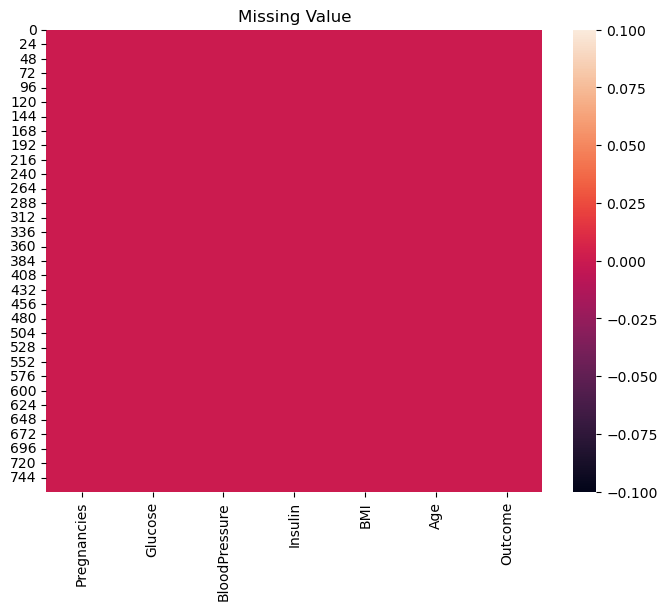

In [9]:
plt.figure(figsize = (8,6))
sns.heatmap(dt.isnull(),cbar = True )
plt.title('Missing Value')
plt.show()

In [10]:
dt.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
763    False
764    False
765    False
766    False
767    False
Length: 768, dtype: bool

In [11]:
def bar_chart(feature):
    diabetes = dt[dt['Outcome'] == 1][feature].value_counts()
    non_diabetes = dt[dt['Outcome'] == 0][feature].value_counts()
    dff = pd.DataFrame([diabetes, non_diabetes])
    dff.index = ['diabetes', 'non_diabetes']
    ax = dff.plot(kind='bar', stacked=True, figsize=(10, 5))
    ax.set_title(feature) 

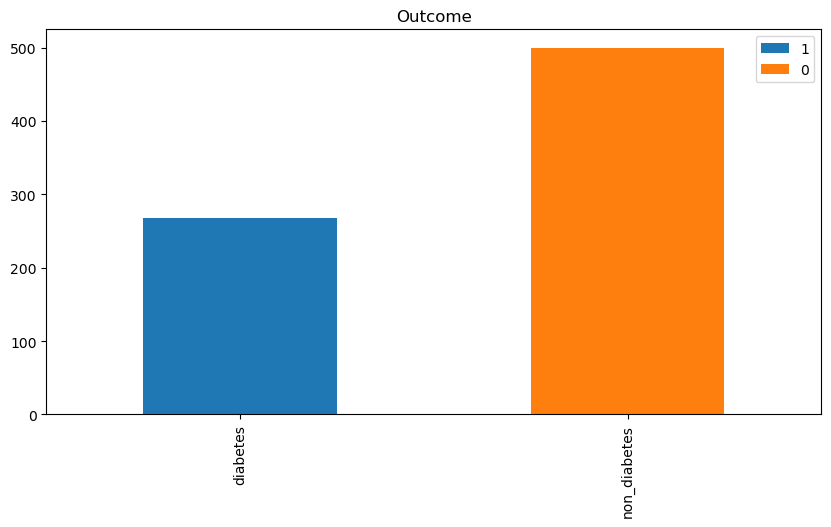

In [12]:
bar_chart("Outcome")

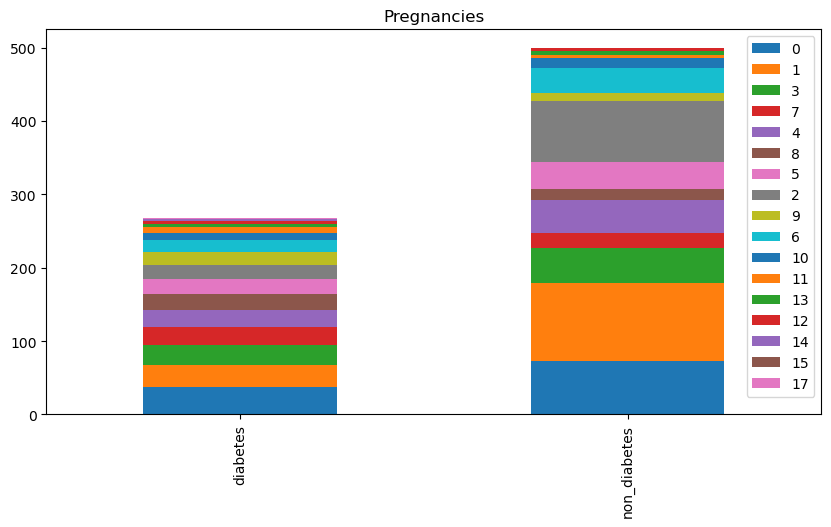

In [13]:
bar_chart("Pregnancies")

In [14]:
#CONVERTING CATEGORICAL COLUMN TO NUMERICAL 

encoder = LabelEncoder()
for column in dt.columns:
    dt[column] = encoder.fit_transform(dt[column])

In [15]:
dt.head(10)

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,Age,Outcome
0,6,86,22,0,123,29,1
1,1,23,19,0,62,10,0
2,8,121,17,0,30,11,1
3,1,27,19,62,77,0,0
4,0,75,4,102,209,12,1
5,5,54,23,0,53,9,0
6,3,16,8,57,103,5,1
7,10,53,0,0,140,8,0
8,2,133,21,179,99,32,1
9,8,63,37,0,0,33,1


In [16]:
dt.describe()

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.843750,59.322917,21.264323,42.417969,112.104167,12.227865,0.348958
std,3.364678,30.510176,8.688687,52.689353,59.651199,11.712724,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,37.000000,16.000000,0.000000,69.000000,3.000000,0.000000
50%,3.000000,55.000000,22.000000,8.500000,109.000000,8.000000,0.000000
75%,6.000000,78.250000,27.000000,80.250000,153.000000,20.000000,1.000000
max,16.000000,135.000000,46.000000,185.000000,247.000000,51.000000,1.000000


In [17]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Pregnancies    768 non-null    int64
 1   Glucose        768 non-null    int64
 2   BloodPressure  768 non-null    int64
 3   Insulin        768 non-null    int64
 4   BMI            768 non-null    int64
 5   Age            768 non-null    int64
 6   Outcome        768 non-null    int64
dtypes: int64(7)
memory usage: 42.1 KB


In [18]:
x=dt.drop(['Outcome'], axis = 1)
y=dt.iloc[:, -1]

In [19]:
x,y

(     Pregnancies  Glucose  BloodPressure  Insulin  BMI  Age
 0              6       86             22        0  123   29
 1              1       23             19        0   62   10
 2              8      121             17        0   30   11
 3              1       27             19       62   77    0
 4              0       75              4      102  209   12
 ..           ...      ...            ...      ...  ...  ...
 763           10       39             25      108  118   42
 764            2       60             21        0  155    6
 765            5       59             22       71   58    9
 766            1       64             14        0   95   26
 767            1       31             21        0   98    2
 
 [768 rows x 6 columns],
 0      1
 1      0
 2      1
 3      0
 4      1
       ..
 763    0
 764    0
 765    0
 766    1
 767    0
 Name: Outcome, Length: 768, dtype: int64)

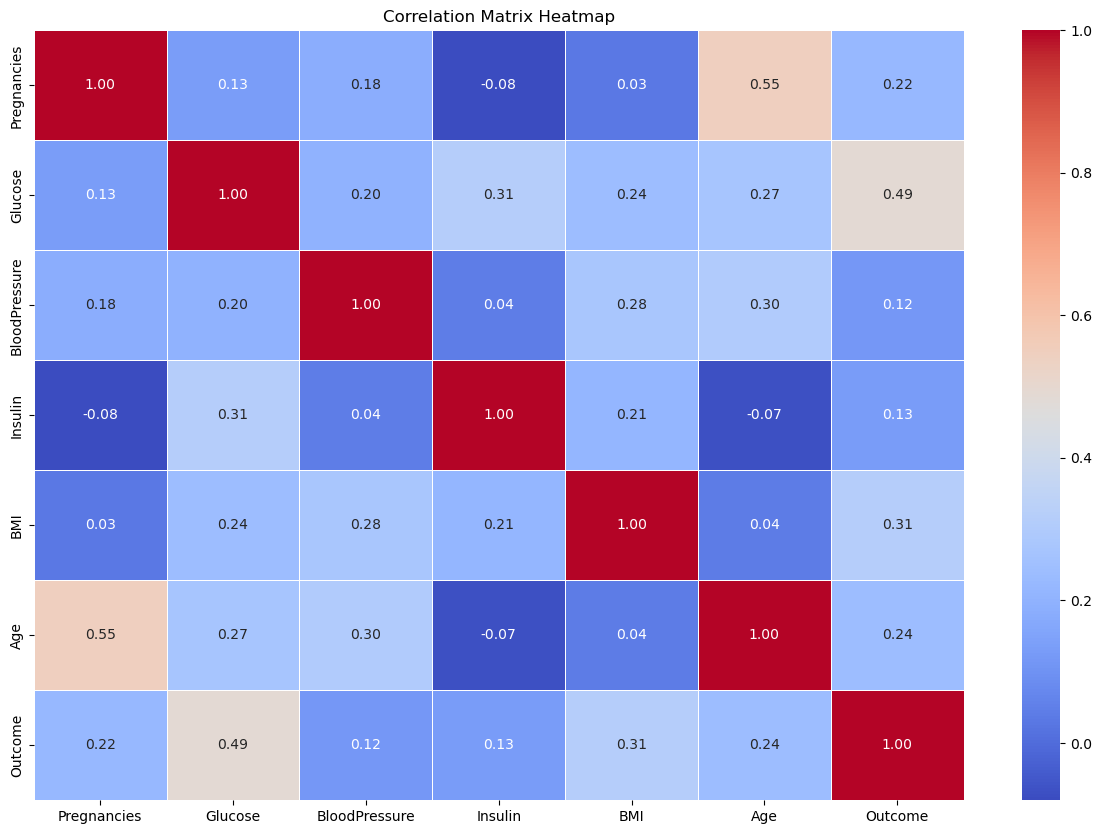

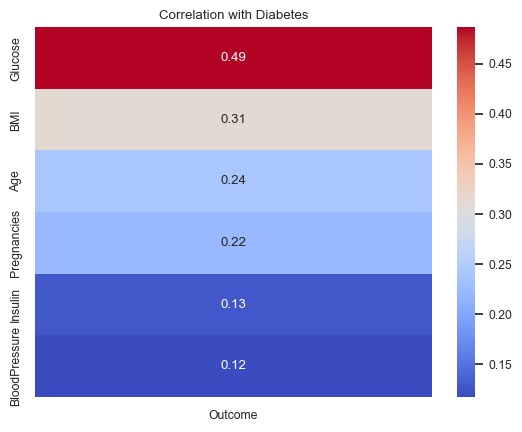

In [20]:
correlation_matrix = dt.corr()
#Graph I.
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title("Correlation Matrix Heatmap")
plt.show()


#Graph II
# Create a heatmap of the correlations with the target column
corr = dt.corr()
target_corr = corr['Outcome'].drop('Outcome')

# Sort correlation values in descending order
target_corr_sorted = target_corr.sort_values(ascending=False)

sns.set(font_scale=0.8)
sns.set_style("white")
sns.set_palette("PuBuGn_d")
sns.heatmap(target_corr_sorted.to_frame(), cmap="coolwarm", annot=True, fmt='.2f')
plt.title('Correlation with Diabetes')
plt.show()

In [21]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [22]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test,y_pred,average = "weighted")
recall = recall_score(y_test,y_pred,average = "weighted")
f1 = f1_score(y_test,y_pred,average = "weighted")
conf_matrix = confusion_matrix(y_test,y_pred)

print("KNN Accuracy:", int(100*accuracy),"%")
print("KNN Precision:", precision)
print("KNN Recall:", recall)
print("KNN F1 score:", f1)
print("Confusion Matrix")
print(conf_matrix)

KNN Accuracy: 68 %
KNN Precision: 0.6805555555555556
KNN Recall: 0.6818181818181818
KNN F1 score: 0.6811580839979714
Confusion Matrix
[[75 24]
 [25 30]]


C:\Users\Paras Sharma\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


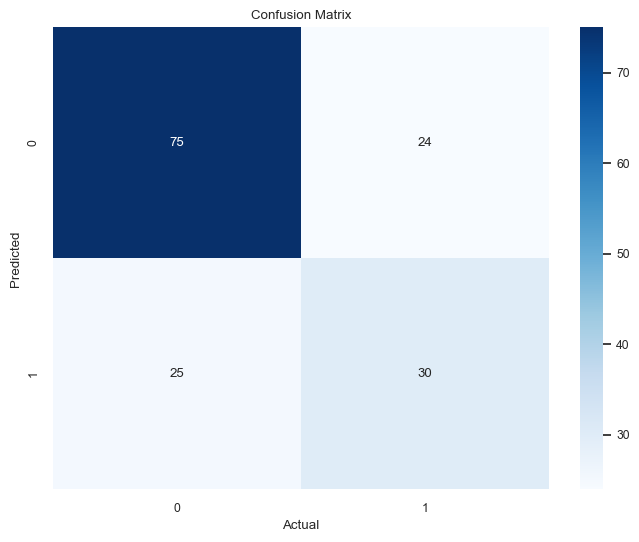

In [23]:
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True,cmap='Blues',fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [24]:
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test,y_pred,average = "weighted")
recall = recall_score(y_test,y_pred,average = "weighted")
f1 = f1_score(y_test,y_pred,average = "weighted")
conf_matrix = confusion_matrix(y_test,y_pred)

print("DTC Accuracy:", int(100*accuracy),"%")
print("DTC Precision:", precision)
print("DTC Recall:", recall)
print("DTC F1 score:", f1)
print("Confusion Matrix")
print(conf_matrix)

DTC Accuracy: 72 %
DTC Precision: 0.7350608143839238
DTC Recall: 0.7272727272727273
DTC F1 score: 0.7300646551724137
Confusion Matrix
[[75 24]
 [18 37]]


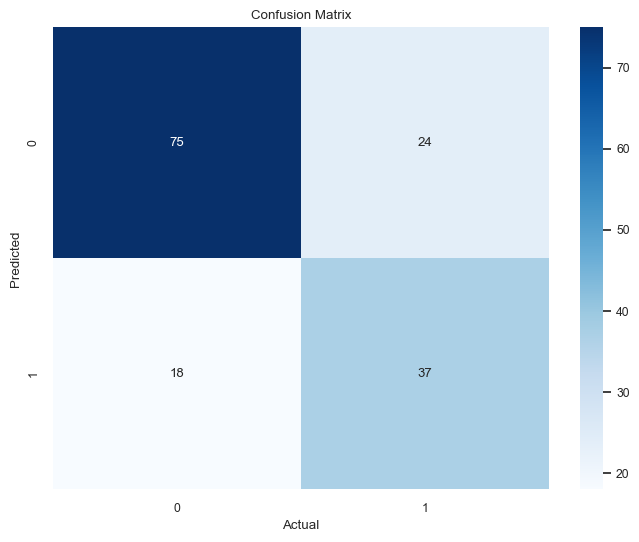

In [25]:
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True,cmap='Blues',fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [26]:
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test,y_pred,average = "weighted")
recall = recall_score(y_test,y_pred,average = "weighted")
f1 = f1_score(y_test,y_pred,average = "weighted")
conf_matrix = confusion_matrix(y_test,y_pred)

print("RFC Accuracy:", int(100*accuracy),"%")
print("RFC Precision:", precision)
print("RFC Recall:", recall)
print("RFC F1 score:", f1)
print("Confusion Matrix")
print(conf_matrix)


RFC Accuracy: 75 %
RFC Precision: 0.7607507288629737
RFC Recall: 0.7597402597402597
RFC F1 score: 0.7602127145274353
Confusion Matrix
[[80 19]
 [18 37]]


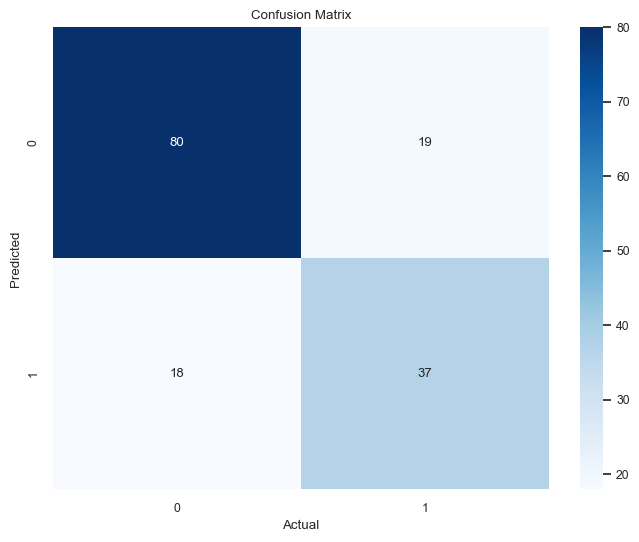

In [27]:
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True,cmap='Blues',fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [28]:
g=GaussianNB()
g.fit(X_train,y_train)
y_pred = g.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test,y_pred,average = "weighted")
recall = recall_score(y_test,y_pred,average = "weighted")
f1 = f1_score(y_test,y_pred,average = "weighted")
conf_matrix = confusion_matrix(y_test,y_pred)

print("GNB Accuracy:", int(100*accuracy),"%")
print("GNB Precision:", precision)
print("GNB Recall:", recall)
print("GNB F1 score:", f1)
print("Confusion Matrix")
print(conf_matrix)

GNB Accuracy: 73 %
GNB Precision: 0.7429623321979564
GNB Recall: 0.7337662337662337
GNB F1 score: 0.7368518625063127
Confusion Matrix
[[75 24]
 [17 38]]


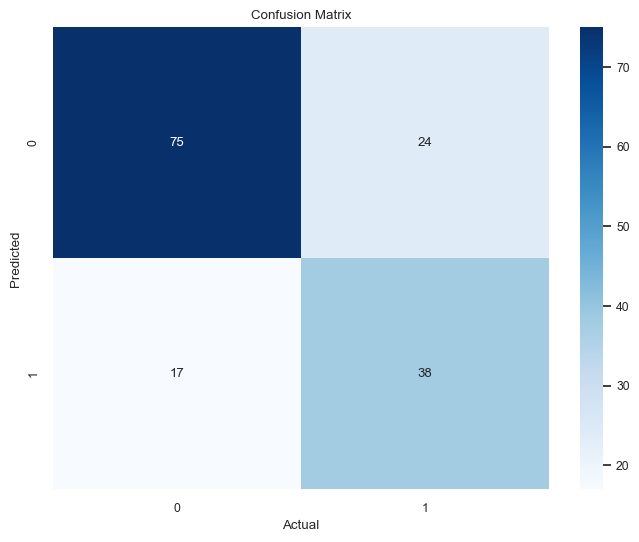

In [29]:
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True,cmap='Blues',fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [30]:
svm=SVC()
svm.fit(X_train,y_train)
y_pred = svm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test,y_pred,average = "weighted")
recall = recall_score(y_test,y_pred,average = "weighted")
f1 = f1_score(y_test,y_pred,average = "weighted")
conf_matrix = confusion_matrix(y_test,y_pred)

print("SVM Accuracy:", int(100*accuracy),"%")
print("SVM Precision:", precision)
print("SVM Recall:", recall)
print("SVM F1 score:", f1)
print("Confusion Matrix")
print(conf_matrix)

SVM Accuracy: 77 %
SVM Precision: 0.7750475811720592
SVM Recall: 0.7792207792207793
SVM F1 score: 0.7748497457235322
Confusion Matrix
[[86 13]
 [21 34]]


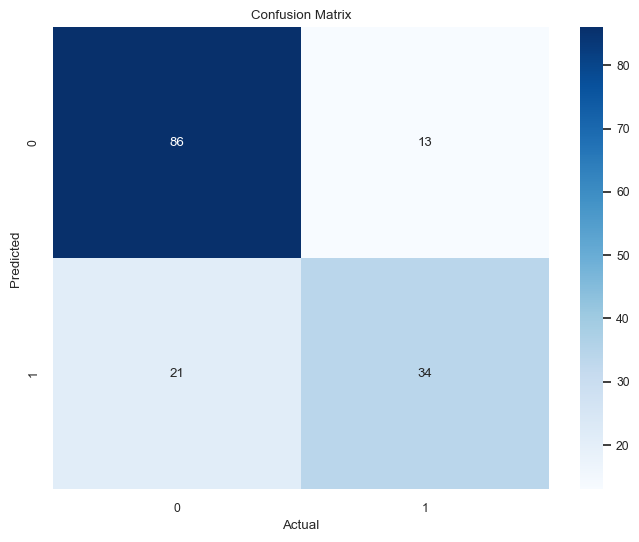

In [31]:
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True,cmap='Blues',fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [32]:
print("Conclusion ")


print("***********************")

print("DecisionTreeClassifier => acc=66% " )
print("Precision: 0.6651422370358887 ")  
print("Recall: 0.6623376623376623 ")
print("F1 score: 0.6636297376093294 ")  

print("************************")

print("RandomForestClassifier => acc=72%  ")
print("Accuracy: 72 % ")
print("Precision: 0.7381824524681667 ")
print("Recall: 0.7272727272727273  ")
print("F1 score: 0.7307760927743085 ")


print("************************")

print("KNeighborsClassifier => acc=73%  ")
print("Precision: 0.7372998768472907 ")
print("Recall: 0.7337662337662337  ")
print("F1 score: 0.7352523582612079  ")


print("************************")


print("SVM => acc=77%  ") 
print("Precision: 0.742500581350283c     ")
print("Recall: 0.7402597402597403  ")
print("F1 score: 0.7412536443148687 ")


print("************************")

print("GaussianNB => acc=72% ")
print("Precision: 0.7334821428571429  ")
print("Recall: 0.7207792207792207  ")
print("F1 score: 0.72468987595038  ")




print("************************")
print("So,from the above techniques used, I think SVM classification algorithm is the most suitable for the diabetes dataset, because its accuracy and precision rate are superior to other algorithms")

Conclusion 
***********************
DecisionTreeClassifier => acc=66% 
Precision: 0.6651422370358887 
Recall: 0.6623376623376623 
F1 score: 0.6636297376093294 
************************
RandomForestClassifier => acc=72%  
Accuracy: 72 % 
Precision: 0.7381824524681667 
Recall: 0.7272727272727273  
F1 score: 0.7307760927743085 
************************
KNeighborsClassifier => acc=73%  
Precision: 0.7372998768472907 
Recall: 0.7337662337662337  
F1 score: 0.7352523582612079  
************************
SVM => acc=77%  
Precision: 0.742500581350283c     
Recall: 0.7402597402597403  
F1 score: 0.7412536443148687 
************************
GaussianNB => acc=72% 
Precision: 0.7334821428571429  
Recall: 0.7207792207792207  
F1 score: 0.72468987595038  
************************
So,from the above techniques used, I think SVM classification algorithm is the most suitable for the diabetes dataset, because its accuracy and precision rate are superior to other algorithms


In [33]:
import pickle


In [34]:
with open('svm1.pkl', 'wb') as file:
    pickle.dump(svm, file)